# Content
* Importing Libraries
* Introduction to Problem
* Knapsack Sample Generator
* Chromosome Design
* Simple Genetic Algorithm Architecture
* Initialization
* Fitness Calculation
* Selection
* Implemented Functions Test
* Next Week

# Importing Libraries

In [1]:
import numpy as np
from matplotlib.pyplot import pie

# Introduction to Problem
The problem that we gonna solve is the <a href="https://en.wikipedia.org/wiki/Knapsack_problem">Knapsack Problem</a>.
<p>The Knapsack optimization is a classical algorithm problem. You have two things: a bag with a size (the weight it can hold) and a set of boxes with different weights and different values. The goal is to fill the bag to make it as valuable as possible without exceeding the maximum weight. It is a famous mathematical problem since 1972. The genetic algorithm is well suited to solve that because it’s an optimization problem with a lot of possible solutions<a href="https://blog.sicara.com/getting-started-genetic-algorithms-python-tutorial-81ffa1dd72f9">(1)</a>. </p>

![knapsack](images/knapsack_problem.png)

# Simple Genetic Algorithm Architecture

The overall Architecture of the genetic algorithm, that we will implement is as follow :

![genetic_architecture](figs/genetic_architecture.PNG)

# Knapsack Sample Generator
First we should implement 2 classes as follow :
* First class called Item represent an item which a have two features :
    * Value
    * Weight
* Second class called Bag represent a bag which have one feature, capacity.

In [2]:
class Item:
    def __init__(self, value, weight) :
        self.value = value
        self.weight = weight

class Bag:
    def __init__(self, capacity) :
        self.capacity = capacity

Now we should generate two things :
* A Bag with randomly chosen capacity
* A random number of Items initialized with randomly chosen weights and values 

In [3]:
np.random.seed(0)
items_number = np.random.randint(30)
max_value = 30
max_weight = 40
# List Comprehensions, for more details see : https://www.pythonforbeginners.com/basics/list-comprehensions-in-python
items = np.array([Item(np.random.rand()*max_value, np.random.rand()*max_weight) for _ in range(items_number)])
bag = Bag(np.random.rand()*(max_weight*len(items)) + max_weight)
print('We have {} items with weight and values of :'.format(len(items)))
for i,item in enumerate(items) :
    print('item {}: Weight=>{} Value=>{}'.format(i, item.weight, item.value))
print('We have a bag with capacity of {}'.format(bag.capacity))

We have 12 items with weight and values of :
item 0: Weight=>33.77062994324069 Value=>17.78533854675055
item 1: Weight=>33.890069551365016 Value=>25.738368528682702
item 2: Weight=>15.375268291707993 Value=>18.70691090357917
item 3: Weight=>2.2685190926977272 Value=>8.926038196334169
item 4: Weight=>19.106604692853995 Value=>8.179688837403397
item 5: Weight=>19.199086895002292 Value=>24.365061863264796
item 6: Weight=>33.4431505414951 Value=>11.783543883024892
item 7: Weight=>25.926874882047887 Value=>10.12188481251805
item 8: Weight=>38.28620635812185 Value=>11.04724619521644
item 9: Weight=>34.803490334337454 Value=>4.210523412379354
item 10: Weight=>32.03643007918577 Value=>14.208241358211314
item 11: Weight=>27.155181204758414 Value=>15.614324386536145
We have a bag with capacity of 385.90367426844006


# Chromosome Design

For solving a problem using Genetic Algorithms, the first step we should take is to find a good structure that represents our search space as best as possible

In knapsack problem, every item can be two different states, Selected and not Selected, So we can represent a binary chromosome which its number of genes is equal to the number of items we have.

![chromosome](images/chromosome.png)

In [4]:
class Chromosome :
    def __init__(self, length) :
        self.genes = np.random.rand(length) > .5
        self.fitness = float('-inf')
        
    def __len__(self) :
        return len(self.genes)
    
    def reset(self) :
        self.fitness = float('-inf')

# Initialization

In this step we will initialize the First Generation :

In [5]:
population_init = lambda size, chrom_size : np.array([Chromosome(chrom_size) for _ in range(size)])

# Fitness Calculation

Calculating fitness is as follow :
* If weights of selected items were more than the capacity of the bag, the fitness will be -1
* Otherwise, the fitness will be equal to the sum of the value of the selected items

In [10]:
def fitness_eval(chrom, items, bag, epsilon=2) :
    selected_items = items[chrom.genes]
    capacity_full = 0
    fitness = 0
    for item in selected_items :
        capacity_full += item.weight
        if capacity_full > bag.capacity :
            fitness = epsilon
            break
        fitness += item.value
    return fitness

# Selection

There are various selection methods out there including :
* Random Selection
* Proportional Selection
    * Roulette wheel selection
    * Stochastic Universal Sampling
* Tournament Selection
* Rank-Based Selection
* Boltzmann Selection
But in this session, we will implement roulette wheel selection and tournament selection.

## Roulette Selection
![roulette_wheel](images/roulette_wheel.png "Roulette Wheel Selection")

You can read more about Roulette Selection and other Selection Algorithms <a href="https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_parent_selection.htm">here</a>.

In [7]:
def roulette_selection(pop) :
    i = 0
    fitnesses = np.array(list(map(lambda c: c.fitness, pop)))
    sum_of_fitnesses = np.sum(fitnesses)
    sel_prob = fitnesses/sum_of_fitnesses
    pie(sel_prob) # Ploting pie chart of probablity of each individual
    sum_prob = sel_prob[i]
    pointer = np.random.rand()
    while sum_prob < pointer :
        i += 1
        sum_prob += sel_prob[i]            
    return pop[i]

## Tournament Selection

![tournoment_selection](images/tournament_selection.jpg)

You can read more about Tournament Selection <a href="https://www.geeksforgeeks.org/tournament-selection-ga/">here</a>.

In [8]:
tournament_selection = lambda pop, sel_pressure: max(np.random.choice(pop, sel_pressure),key=lambda c: c.fitness)

# Implemented Functions Test

Selected Individual Fitness: 85.7276106440008
Genes: [False False  True False False  True  True False  True  True False  True]


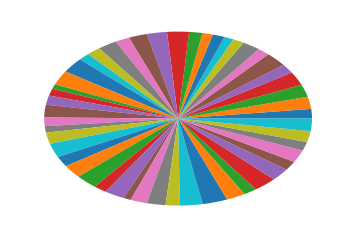

In [9]:
pop_size = 50
selection_method = '' # You can change this to 'tournament' for changing the selection function
# Initializing First Generation
pop = population_init(pop_size, len(items))

# Calculating Fitness of Each Individual
for chrom in pop :
    chrom.fitness = fitness_eval(chrom)

# Selecting just an individual for ensuring that implemented functions work properly
if selection_method == 'tournament' :
    sel_ind = tournament_selection(pop, 10)
else :
    sel_ind = roulette_selection(pop)
print('Selected Individual Fitness: {}\nGenes: {}'.format(sel_ind.fitness, sel_ind.genes))

# Next Week

Next week, we will implement :
* Different Crossover Operations
* Different Mutation Operations
* Complete Genetic Alogirhtm for solving this problem